<a href="https://colab.research.google.com/github/samibahig/PersonnalExercices/blob/main/sklearn_librairie_demo_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo 9 : Scikit-learn Library/ Démo 9 : librairie Scikit-learn


PLEASE DO NOT MODIFY THIS COPY! 
Create your own copy: file -> save a copy in drive

This demo was initially inspired from http://scikit-learn.org/stable/tutorial/index.html.

In this lab you will implement:
- train test split
- fitting a model
- creating a train/validation curve
- SVMs and their hyperparameters
- plotting decision boundaries
- basic bagging/boosting

<hr>

Cette démo est inspirée du lien http://scikit-learn.org/stable/tutorial/index.html.

Dans ce lab, vous implémenterez:
- une séparation train/test
- l'entraînement de modèles
- les courbes d'entraînements et validation sur un graphique
- SVM selon différents hyperparamètres
- les frontières de décision
- des méthodes d'ensemble (Bagging/Boosting)


In [ ]:
# Verify that sklearn is properly installed by running this cell
import sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Datasets/Données

sklearn allows directly loading a certain number of datasets.

<hr>

sklearn donne accès directement à certains datasets.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

Let's check the size of our loaded data.

<hr>

Regardons la dimension de nos données.



In [ ]:
print('iris', iris.data.shape, iris.target.shape)

iris (150, 4) (150,)


# Nouvelle section

# k-NN Classification/Classification avec k_PPV

## iris dataset

We will now use kNN to classify the iris dataset. `sklearn.datasets` gives us all the data but we will want to separate it into a train and test set. The original way to do this was as follows:

<hr>

Nous allons utiliser les k-PPV afin de classifier le dataset iris. `sklearn.datasets` nous donne accès à ce dataset, mais nous voulons le séparer en ensemble d'entraînement et de test. La manière originale avec laquelle nous procédions était: 

In [ ]:
# Manual separation into train/test
np.random.seed(0)
indices = np.random.permutation(len(iris.target))
old_iris_train_x = iris.data[indices[:100]]
old_iris_test_x = iris.data[indices[100:]]
old_iris_train_y = iris.target[indices[:100]]
old_iris_test_y = iris.target[indices[100:]]

print(f'Train X shape {old_iris_train_x.shape}, Y shape {old_iris_train_y.shape}')

Train X shape (100, 4), Y shape (100,)


But we can do it more easily with [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), make the size of the train set = 100 and test set = 50.

<hr>

Nous pouvons procéder de manière plus simple en utilisant [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Le nombre d'exemples dans l'ensemble d'entraînement devrait être 100 et 50 pour l'ensemble test.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
(iris_train_x, iris_test_x, 
 iris_train_y, iris_test_y) = train_test_split(iris.data, iris.target, test_size=50)
print(f'Train X shape {iris_train_x.shape}, Y shape {iris_train_y.shape}')

Train X shape (100, 4), Y shape (100,)


We can now use the sklearn functions to implement a nearest neighbor classifier! First, initialize the classifier then call `fit` on your train data, and train labels.

<hr>

Nous pouvons maintenant utiliser des fonctions de sklearn afin d'implémenter le k-PPV. Initialisons d'abord le classifier et appelons ensuite la fonction `fit` sur notre ensemble d'entraînement.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# try changing n_neighbors to 2, 6, 10
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(iris_train_x, iris_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Now let's see how well we did on the test data by calling `predict` on our test data.

<hr>

Analysons la performance de notre modèle en appellant la fonction `predict` sur notre ensemble test.

In [ ]:
# fill in here 
predictions = knn.predict(iris_test_x)
accuracy = (predictions == iris_test_y).mean()

print(f'Prediction accuracy {accuracy}')

Prediction accuracy 0.96


Remember our plots of hyperparameters vs performance? Let's make one comparing `k` to the accuracy on the test. For every value in our `k_values`, we will call `fit` then `predict` and then add the accuracy of our predictions to a list `k_perf`.

<hr>

Vous souvenez-vous des graphiques performance vs hyperparamètres? Effectuons un de ces graphiques en visualisant la performance de l'ensemble test en fonction de `k`. Pour chaque valeur dans `k_values`, nous allons appeller `fit` et `predict` et ensuite ajouter la précision des prédictions dans une liste nommée `k_perf`.

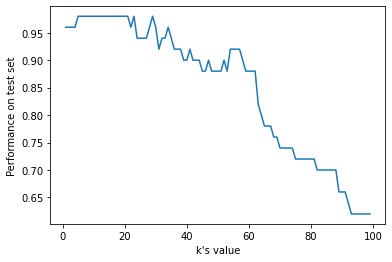

In [ ]:
k_values = np.arange(1, 100)
k_perf = []

for k in k_values:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(iris_train_x, iris_train_y)
    test_pred = knn.predict(iris_test_x)
    k_perf.append((test_pred == iris_test_y).mean())

plt.xlabel('k\'s value')
plt.ylabel('Performance on test set')
plt.plot(k_values, k_perf)

## Digits Dataset

Now that you're experienced, let's make curve from scratch! 
Import the dataset (we've given you some code to visualize a single data example), split it into train (1500) and test (297), and for our values of `k` make a plot of the test set accuracy! 

<hr>

Maintenant que vous êtes expérimentés, repartons de zéro! Importez le dataset *digits* (quelques lignes de code sont fournies afin que vous puissiez visualiser un exemple), séparez le dataset en ensemble d'entraînement (1500) et test (297), et pour les valeurs de `k`, effectuez un graphique de la précision du test set.

Visualizing a digit with target 0


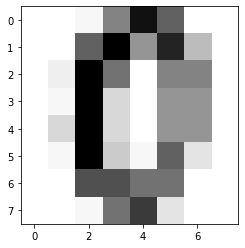

In [ ]:
# fill in here
digits = datasets.load_digits()

# Visualize a digits example
i = 10
plt.imshow(digits.data[i,:].reshape(8, 8), interpolation="nearest", cmap='Greys')
print(f'Visualizing a digit with target {digits.target[i]}')
np.random.seed(0)
(digits_train_x, digits_test_x, 
 digits_train_y, digits_test_y) = train_test_split(digits.data, digits.target, test_size=297)

# to add some noise
# digits_train_y[:100] = digits_train_y[100:200]


To add a little more magic, let's also plot the *train* set accuracy and add it to the list `k_train`. The accuracy on the test set will be in `k_test`.

<hr>

Afin d'ajouter un peu de magie, trouvons également la courbe de précision de l'ensemble d'entraînement, en y ajoutant ses valeurs dans la liste `k_train`. Les précisions de l'ensemble test seront emmagasinées dans `k_test`.

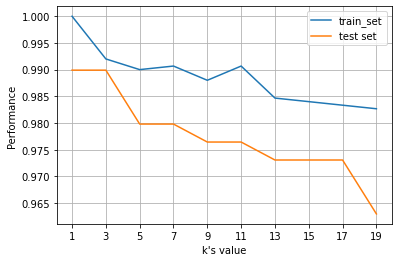

In [ ]:
# fill in here
k_values = np.arange(1, 20, 2)
k_test = []
k_train = []
np.random.seed(0)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(digits_train_x, digits_train_y)
    test_pred = knn.predict(digits_test_x)
    k_test.append((test_pred == digits_test_y).mean())
    train_pred = knn.predict(digits_train_x)
    k_train.append((train_pred == digits_train_y).mean())

plt.xlabel('k\'s value')
plt.ylabel('Performance')
plt.plot(k_values, k_train, label='train_set')
plt.plot(k_values, k_test, label='test set')
plt.xticks(k_values)
plt.grid()
plt.legend()

Look at the curve. Where are we underfitting? Where are we overfitting?

<hr>

Regardons la courbe. Où y a-t-il du sur-entraînement, du sous-entraînement?

# SVM

Now we're going to take a look at SVMs and how their hyperparameters affect their training and final decision boundaries. We're going to simplify our iris dataset to 2 features and 2 classes to make it easier to visualize.

<hr>

Nous allons maintenant utiliser le SVM et analyser comment ses hyperparamètres affectent l'entraînement et la frontière de décision. Nous allons simplifier nos visualisations avec iris en conservant 2 traits et 2 classes.

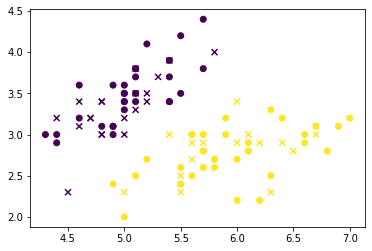

In [ ]:
# load the iris dataset again
np.random.seed(2)
(iris_train_x, iris_test_x, 
 iris_train_y, iris_test_y) = train_test_split(iris.data, iris.target, test_size=50)
# check the shape of iris_train_x

# We only keep 2 features, and 2 classes
# first take classes 0 and 1
iris_trainsvm_x = iris_train_x[np.logical_or(iris_train_y == 0, iris_train_y == 1)]
iris_trainsvm_y = iris_train_y[np.logical_or(iris_train_y == 0, iris_train_y == 1)]
iris_testsvm_x = iris_test_x[np.logical_or(iris_test_y == 0, iris_test_y == 1)]
iris_testsvm_y = iris_test_y[np.logical_or(iris_test_y == 0, iris_test_y == 1)]
# check the shape of iris_trainsvm_x

# now take only features 0, 1
iris_trainsvm_x  = iris_trainsvm_x[:,[0,1]]
iris_testsvm_x = iris_testsvm_x[:,[0,1]]
# check the shape of iris_trainsvm_x

# Visualize the train dataset as o
plt.scatter(iris_trainsvm_x[:,0], iris_trainsvm_x[:,1], c=iris_trainsvm_y)
# Visualize test data as x
plt.scatter(iris_testsvm_x[:,0], iris_testsvm_x[:,1], c=iris_testsvm_y, marker='x')


We're going to use a helper function that will help us with plotting later

<hr>

Nous utiliserons cette fonction plus tard pour nos visualisations

In [ ]:
# Helper function that takes a dataset and returns
# (x,y) coordinates for a grid covering
# the intervals [x.min(), x.max()] and [y.min(), y.max()]

def get_plot_grid(data):
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    return xx, yy

Let's train a basic linear SVM and instead of just using `predict`, we will plot the decision boundary

<hr>

Entraînons un SVM linéaire de base et plutôt que de seulement utiliser `predict`, nous allons visualiser la frontière de décision. 

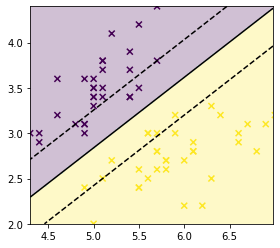

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(iris_trainsvm_x, iris_trainsvm_y)

# Points where to plot the decision function's value
xx, yy = get_plot_grid(iris_trainsvm_x)

# We get the value of the decision function on these points
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the points in two colours
plt.scatter(iris_trainsvm_x[:,0], iris_trainsvm_x[:,1], c=iris_trainsvm_y, marker='x')

# Plot the decision boundary Z=0 as a solid line and Z=1 or -1 as dashed lines
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
        levels=[-1, 0, 1])

# Just for effect, add the points colour to their side
plt.imshow(Z> 0, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=.25, origin='lower')

That code for making plots is pretty complicated so we'll make it a helper function and use it in later plots.

<hr>

Ce code est assez compliqué, faisons ainsi une fonction afin de l'utilisée par après.

In [ ]:
def plot_regions(predictor, data_x, data_y, contour=True, title=''):
    """
    predictor: training classifier. Must have a predict method
    data_x: n x d matrix, n the number of examples, d the number of features
    data_y: label vector, dimension (d, )
    title: plot title
    """
    xx, yy = get_plot_grid(data_x)
    
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=0.25, origin='lower', interpolation='none')
    plt.imshow(Z > 0, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=.25, origin='lower')
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
        levels=[-1, 0, 1])
    plt.scatter(data_x[:,0], data_x[:,1], c=data_y, marker='x')
    plt.title(title)

## SVM: Penalty and Class Weights/ SVM: Pénalité and poids sur les Classes

Our SVM has a penalty for errors but we've implicitly made an assumption: all errors are equal! Imagine a scenario where one class has many more points than the other, would we want all the errors to be equal or maybe we would want errors proportional to the number of points of that class? Let's change the weight of errors per class and see what happens.

<hr>

Notre SVM a une pénalité pour les erreurs, mais nous avons implicitement assumer que: toutes les erreurs sont égales! Imaginons une situation où une classe possède beaucoup plus d'exemples que l'autre. Nous voudrions que le nombre d'erreurs de cette classe soit égale ou proportionel au nombre de points appartenant à cette classe. Modifions alors le poids des erreurs et regardons ce qu'il se passe. 

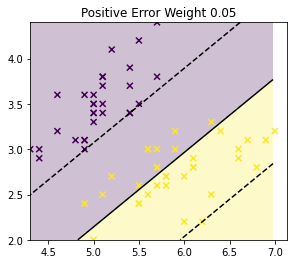

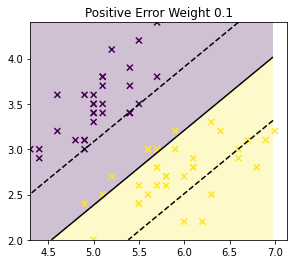

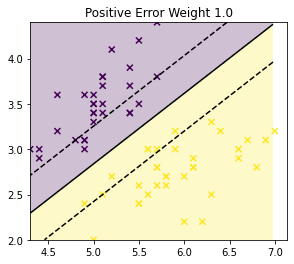

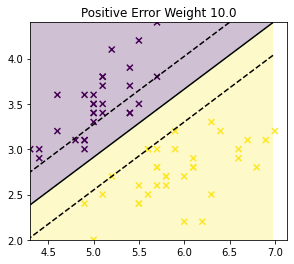

In [ ]:
for pos_weight in [0.05, 0.1, 1.0, 10.0]:
    # fill in here
    svc = SVC(kernel='linear', class_weight={0:1.0, 1:pos_weight})
    svc.fit(iris_trainsvm_x, iris_trainsvm_y)
    plot_regions(svc, iris_trainsvm_x, iris_trainsvm_y, title=f'Positive Error Weight {pos_weight}')   
    plt.show()

## SVM: Polynomial Kernel Degree/ SVM noyau polynomial

We've been looking at a linear SVM but our decision boundary is decided non-linear. Let's switch to a `polynomial` kernel and look at what happens when our polynomial has different degrees

<hr>

Nous avons entraîné un SVM linéaire mais, notre frontière de décision ne devrait clairement pas être linéaire. Optons pour un SVM avec un noyau `polynomial` et évaluons avec différents degrés de cette fonction. 



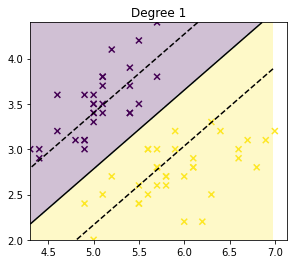

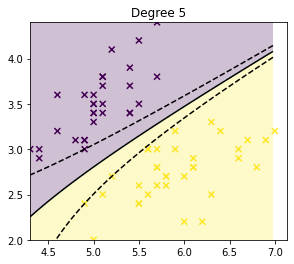

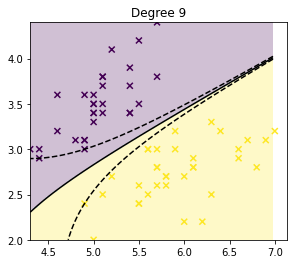

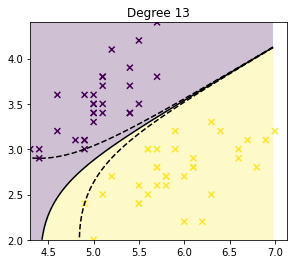

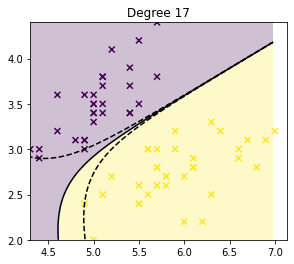

In [ ]:
for degree in range(1,18,4):
    # fill in here
    svc = SVC(kernel='poly', degree=degree)
    svc.fit(iris_trainsvm_x, iris_trainsvm_y)
    plot_regions(svc, iris_trainsvm_x, iris_trainsvm_y, title=f'Degree {degree}')    
    plt.show()

This is when we're plotting the training data but let's see what happens when we plot the test data instead!

<hr>

Ceci est lorsque nous utilisons nos données d'entraînement mais voyons plutôt avec nos données test!

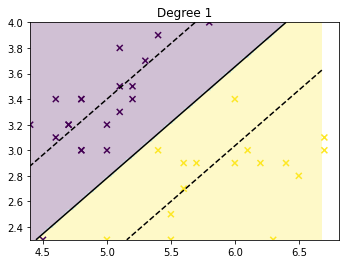

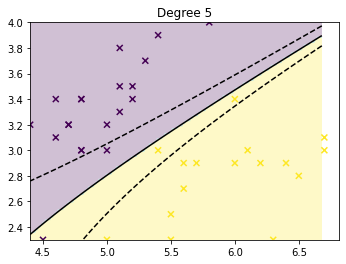

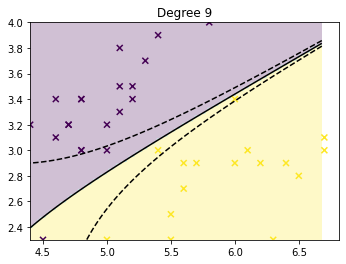

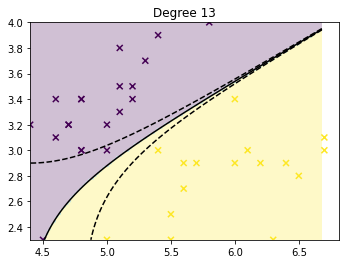

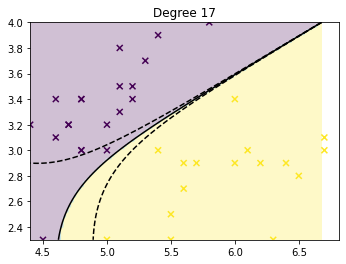

In [ ]:
for degree in range(1,18,4):
    svc = SVC(kernel='poly', degree=degree)
    svc.fit(iris_trainsvm_x, iris_trainsvm_y)
    plot_regions(svc, iris_testsvm_x, iris_testsvm_y, title=f'Degree {degree}')    
    plt.show()

## SVM: The RBF Kernel and Gamma/SVM: Le noyau RBF et Gamma

We saw how changing the degree of a polynomial kernel could affect the decision boundary but what if we use a completely different kernel! Let's now try using `rbf` (radial basis function) which allows us to have more "circular" decision boundaries. An important hyperparameter for it is `gamma` which determines how far a single example influences (the bigger the gamma, the less the influence).

<hr>

Nous avons vu que modifier le degré du noyau polynomial pouvait affecter la frontière de décision, mais si nous utilisons un noyau complètement différent? Utilisons `rbf` (radial basis function) qui nous permet d'avoir des frontières de décision plus circulaires. Un hyperparamètre important qu'est `gamma` détermine comment un exemple peut influencer la décision (plus gamma est élevé, moins ce dernier a de l'influence).

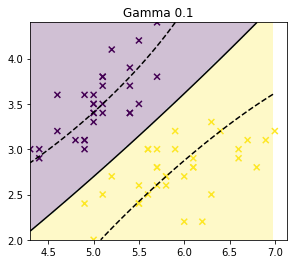

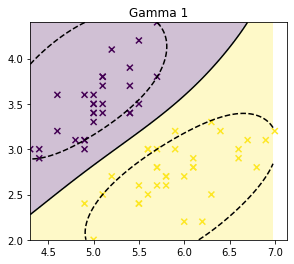

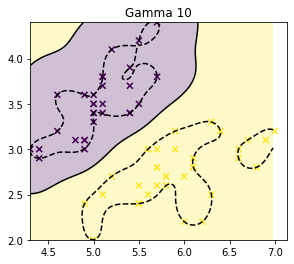

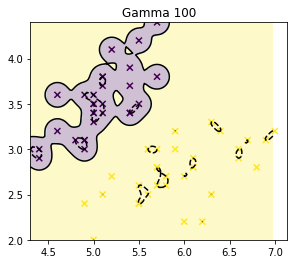

In [ ]:
for gamma in [0.1, 1, 10, 100]:
    # fill in here
    svc = SVC(kernel='rbf', gamma=gamma, C=1)
    svc.fit(iris_trainsvm_x, iris_trainsvm_y)
    plot_regions(svc, iris_trainsvm_x, iris_trainsvm_y, title=f'Gamma {gamma}')    
    plt.show()

We know that gamma is pretty interesting but how do gamma and C interact? Change the values of C above and check how the penalty changes the decision boundaries.

<hr>

Nous savons que l'effet de gamma est intéressant, mais comment gamma et C interagissent-ils? Changez les valeurs de C plus haut et voyez comment la pénalité change la frontière de décision.

# All the classifiers!/Tous les classifieurs!
Previously, we restricted ourselves to the first two classes, let's add the third back in and also play around with a bunch of other classifiers! One of the great things about `sklearn` is that it has so many different classifiers, methods, and setting that make it so powerful. Here, we've collected a sample of a couple different classifiers and plotted their decision boundaries, go ahead and try some more!

<hr>

Précédemment, nous nous étions restreints aux 2 premières classes. Ajoutons une troisième classe and voyons ce qu'il se passe avec plusieurs classifieurs! Un des avantages avec `sklearn` est qu'il y a beaucoup d'implémentations de classifieurs différents, ce qui représente un outil très puissant. Ici, nous avons sélectionné plusieurs classifeurs et avons tracé leurs frontières de décisions. Ne vous gênez pas à en essayer d'autres! 

In [ ]:
# Training data with all 3 classes!
# But still with 2 features
iris_train2_x = iris_train_x[:,:2]
iris_test2_y = iris_test_x[:,:2]

# plot_regions generalized to more than 2 classes
def plot_many_regions(predictor, data_x, data_y, title=''):
    """
    predictor: training classifier. Must have a predict method
    data_x: n x d matrix, n the number of examples, d the number of features
    data_y: label vector, dimension (d, )
    title: plot title
    """
    xx, yy = get_plot_grid(data_x)
    
    Z = predictor.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=0.4, origin='lower', interpolation='none')
    plt.scatter(data_x[:,0], data_x[:,1], c=data_y, marker='x')
    plt.title(title)
    
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

classifiers = [
    ('naive bayes gaussian kernel', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('decision tree', DecisionTreeClassifier()),
    ('random forests', RandomForestClassifier()),
    ('svm rbf', SVC()),
    ('svm linear', SVC(kernel='linear')),
    ('knn with bagging', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5))
]

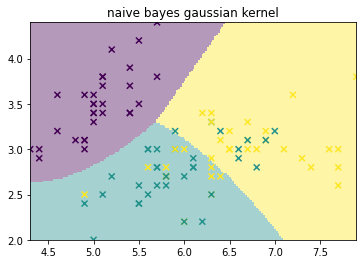

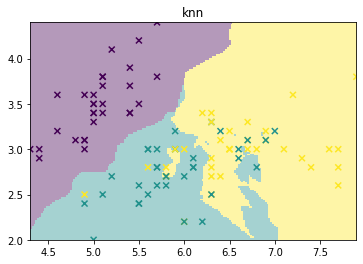

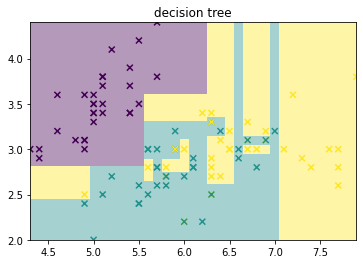

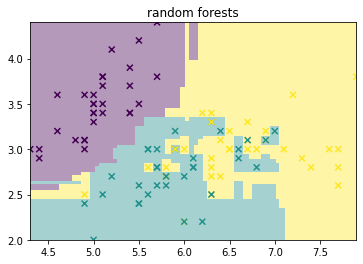

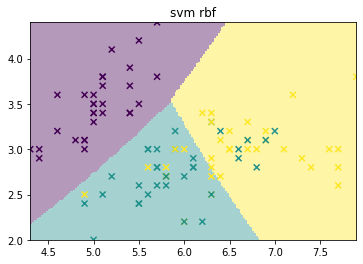

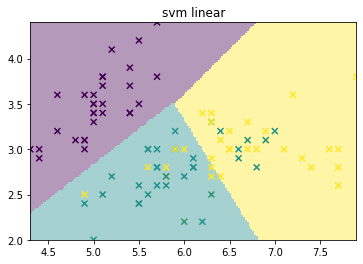

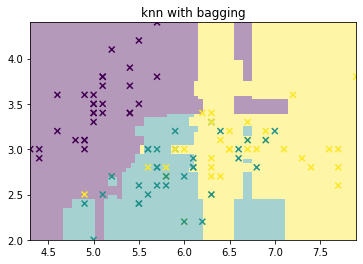

In [ ]:
for model_name, model_instance in classifiers:
    plt.clf()
    classifier = model_instance
    classifier.fit(iris_train2_x, iris_train_y)

    plot_many_regions(classifier, iris_train2_x, iris_train_y, title=model_name)

# Pipeline

Sklearn allows us to create a *pipeline* which combines all the preprocessing steps as well as our model (called an *estimator* in sklearn) as the last step of the pipeline.
Let's create a pipeline which will first normalize our iris data, and then apply our model.

<hr>

Sklearn nous permet de créer un *pipeline* qui combine tous les étapes de pré-traitement des données, ainsi que notre modèle.

Nous allons instantier un pipeline qui normalizera notre jeu de données (iris), et puis appliquera notre modèle (kPPV).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=2)
    )

np.random.seed(0)
(iris_train_x, iris_test_x, 
 iris_train_y, iris_test_y) = train_test_split(iris.data, iris.target, test_size=50)

# fit() applies the StandardScaler() to the data first, and then applies knn.fit() with the preprocessed data
pipe.fit(iris_train_x, iris_train_y)

predictions = pipe.predict(iris_test_x)
accuracy = (predictions == iris_test_y).mean()

print(f'Prediction accuracy {accuracy}')

Prediction accuracy 0.94


# GridSearchCV

`GridSearchCV` allows for an exhaustive search over specified parameter values for an estimator. It can be used with the `pipeline` to search across all the hyperparameters in of your pipeline. `GridSearchCV` implements a `fit` method that runs `fit` with all sets of parameters from a grid of parameter values specified with the `param_grid`.

<hr>

`GridSearchCV` permet une recherche exhaustive sur les valeurs de paramètres spécifiées pour un estimateur. Il peut être utilisé avec le `pipeline` pour rechercher dans tous les hyperparamètres de votre pipeline. `GridSearchCV` implémente une méthode` fit` qui exécute `fit` avec tous les ensembles de paramètres à partir d'une grille de valeurs de paramètres spécifiées avec le` param_grid`.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)

parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

# with 5 fold cross-validation
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(iris_train_x, iris_train_y)

print('Best Parameter:', grid.best_params_)
print('Best Score:', grid.best_score_)


Best Parameter: {'SVM__C': 10, 'SVM__gamma': 0.1}
Best Score: 0.9700000000000001
